In [78]:
#-----------------------------------time stretch(works)--------------------------------------------

# from audiostretchy.stretch import stretch_audio 

# stretch_audio("ESC-50-master/audio/5-9032-A-0.wav", "number2.wav", ratio=0.5)

#-----------------------------------pitch stretch(doesn't quite work)------------------------------
# import torch
# import numpy as np
# from scipy.io import wavfile
# from torch_pitch_shift import *

# # read an audio file
# # SAMPLE_RATE, sample = wavfile.read("./wavs/test.wav")

# SAMPLE_RATE, sample = wavfile.read("ESC-50-master/audio/5-9032-A-0.wav")

# # convert to tensor of shape (batch_size, channels, samples)
# dtype = sample.dtype
# sample = torch.tensor(
#     [np.swapaxes(sample, 0, 1)],  # (samples, channels) --> (channels, samples)
#     dtype=torch.float32,
#     device="cuda" if torch.cuda.is_available() else "cpu",
# )


# def test_pitch_shift_2_up():
#     # pitch up by 12 semitones
#     up = pitch_shift(sample, 2, SAMPLE_RATE)
#     assert up.shape == sample.shape
#     wavfile.write(
#         "./wavs/shifted_octave_+1.wav",
#         SAMPLE_RATE,
#         np.swapaxes(up.cpu()[0].numpy(), 0, 1).astype(dtype),
#     )


# def test_pitch_shift_12_down():
#     # pitch down by 12 semitones
#     down = pitch_shift(sample, -12, SAMPLE_RATE)
#     assert down.shape == sample.shape
#     wavfile.write(
#         "./wavs/shifted_octave_-1.wav",
#         SAMPLE_RATE,
#         np.swapaxes(down.cpu()[0].numpy(), 0, 1).astype(dtype),
#     )


# def test_pitch_shift_to_fast_ratios():
#     # get shift ratios that are fast (between +1 and -1 octaves)
#     for ratio in get_fast_shifts(SAMPLE_RATE):
#         print("Shifting", ratio)
#         shifted = pitch_shift(sample, ratio, SAMPLE_RATE)
#         assert shifted.shape == sample.shape
#         wavfile.write(
#             f"./wavs/shifted_ratio_{ratio.numerator}-{ratio.denominator}.wav",
#             SAMPLE_RATE,
#             np.swapaxes(shifted.cpu()[0].numpy(), 0, 1).astype(dtype),
#         )

# test_pitch_shift_2_up()


#---------------------------------librosa methods: time & pitch stretch--------------------------
import librosa
import pandas as pd
import soundfile as sf
from tqdm import tqdm
import os
import glob

    #------------------------------time stretch-------------------------------------
# y, sr = librosa.load("ESC-50-master/audio/5-9032-A-0.wav")

# y_changed = librosa.effects.time_stretch(y, rate=0.8)

# sf.write("num1.wav", y_changed, sr)

#     #------------------------------pitch shift-----------------------------------------
# y, sr = librosa.load("ESC-50-master/audio/5-9032-A-0.wav")

# y_changed = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=2)

# sf.write("pitch.wav", y_changed, sr)



    #------------------------------delete already processed data------------------------
directory_path = "ESC-50-master/audio"    

pattern = os.path.join(directory_path, "*.wav-*")    

files_to_remove = glob.glob(pattern)

for file_path in files_to_remove:
    os.remove(file_path)

    #------------------------------systematically process all the data------------------
    

rates = [0.9, 1.1]
pitches = [-2, 2, -1, 1]

for k in range(len(pitches)):
    df = pd.read_csv('ESC-50-master/meta/esc50.csv')
    out_col = 'category'
    in_col = 'filename'
    c2i = {}
    i2c = {}
    num_classes = 10
    df = df[df['esc10']]
    categories = sorted(df[out_col].unique())
    for i, category in enumerate(categories):
        c2i[category] = i
        i2c[i] = category
            
    folder_path = 'ESC-50-master/audio'
    for ind in tqdm(range(len(df))):
        row = df.iloc[ind]
        
        curr_file_path = os.path.join(folder_path, row[in_col])
        
        y, sr = librosa.load(curr_file_path)  
        
        output_path_rate = os.path.join(folder_path, row[in_col] + "-rate-"+str(rates[k])+".wav")
        output_path_pitch = os.path.join(folder_path, row[in_col] + "-pitch-"+str(pitches[k])+".wav")
        # output_path_rate_pitch = os.path.join(folder_path, row[in_col] + "-mix-"+"rate"+str(rates[k])+"pitch"+str(pitches[k])+".wav")
        
        y_changed_rate = librosa.effects.time_stretch(y, rate=rates[k])
        y_changed_pitch = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=pitches[k])
        # y_changed_rate_pitch = librosa.effects.time_stretch(y_changed_pitch, rate=rates[k])
        

        for j in range(len(rates)):
            output_path_mix = os.path.join(folder_path, row[in_col] + "-mix-"+"rate"+str(rates[j])+"pitch"+str(pitches[k])+".wav")
            y_changed_rate_pitch_in = librosa.effects.time_stretch(y_changed_pitch, rate=rates[j])
            sf.write(output_path_mix, y_changed_rate_pitch_in, sr)
        
        sf.write(output_path_rate, y_changed_rate, sr)
        sf.write(output_path_pitch, y_changed_pitch, sr)
#         # sf.write(output_path_rate_pitch, y_changed_rate_pitch, sr)
        
#         # if i == 1:
#         #     break
        




  0%|          | 0/400 [00:00<?, ?it/s]


IndexError: list index out of range

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 221.3 kB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.8 kB/s eta 0:00:00a 0:00:05
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 7.1 kB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━

In [1]:
import librosa
import numpy as np
import pandas as pd
import os
import sys
from torch.utils.data import Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torch.utils.data import DataLoader
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
import copy

# import subprocess
# import glob
# import wavio


In [2]:
def get_features(file_path):   

    wav, sr = librosa.load(file_path, sr=44100)
    # y_shifted = librosa.effects.pitch_shift(wav, sr, n_steps=4)
    start = wav.nonzero()[0].min()
    end = wav.nonzero()[0].max()
    num_nonzero = len(wav.nonzero()[0])

    sample_num = 44100
    
    data = []

    step_num = int((44100 * 1) /2)
    hop_length = 44100 // 50
    # step_num = int((22000 * 1) /2)
    # hop_length = 22000 // 50
    
    count = 0
    
    mm1 = 256
    mm3 = 256
    # mm5 = 12
    mm11 = 128

    ind = 0
    
    min_freq = 1000000
    max_freq = 0
    # print("helloo? ")
    # print(start)

    # print(end)
    # print(wav)
    
    # downsample the input data
    # target_sr = 22000
    
    # wav = librosa.resample(wav, orig_sr=sr, target_sr=target_sr)
    ind = start

    # ww = librosa.feature.melspectrogram(y=wav, sr=44100, hop_length=hop_length, n_mels = mm1)
    # ww = librosa.power_to_db(ww, ref=np.max)
    # plt.figure()        
    # librosa.display.specshow(ww)
    # plt.colorbar()
    # while ind + step_num + step_num <= wav.shape[0]:
    while ind + step_num + step_num <= end:
        frame = wav[ind:ind+step_num+step_num]
        ind = ind + step_num
        count = count + 1
        
        # melspec
        melspec = librosa.feature.melspectrogram(y=frame, sr=44100, hop_length=hop_length, n_mels = mm1)
        #melspec = librosa.feature.melspectrogram(y=frame, sr=22000, hop_length=hop_length, n_mels = 128)
        melspec = librosa.power_to_db(melspec, ref=np.max)


      
        m1 = np.mean(melspec,axis = 1)
        m2 = np.std(melspec,axis = 1)
        
        # MFCC
        # mfcc = librosa.feature.mfcc(y=frame, sr=44100, hop_length=hop_length, n_mfcc = 256)
        mfcc = librosa.feature.mfcc(S=melspec, n_mfcc=mm3)
        mfcc = librosa.power_to_db(mfcc, ref=np.max)
        delta_mfcc  = librosa.feature.delta(mfcc)
        delta_mfcc = librosa.power_to_db(delta_mfcc, ref=np.max)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        delta2_mfcc = librosa.power_to_db(delta2_mfcc, ref=np.max)
        
        m3 = np.mean(mfcc,axis = 1) 
        m4 = np.std(mfcc,axis = 1)
        m7 = np.mean(delta_mfcc,axis = 1) 
        m8 = np.std(delta_mfcc,axis = 1)
        m9 = np.mean(delta2_mfcc,axis = 1) 
        m10 = np.std(delta2_mfcc,axis = 1)
        
        #chroma_stft
        chroma_stft = librosa.feature.chroma_stft(y=frame, sr=44100, hop_length=hop_length, n_chroma=mm11)
        chroma_stft = librosa.power_to_db(chroma_stft, ref=np.max)
        m11 = np.mean(chroma_stft,axis = 1)
        # m12 = np.std(chroma_stft,axis = 1)
        
       

        
        # Chroma_cqt
        # c = librosa.feature.chroma_cqt(y=frame, sr=sr, n_chroma=128, hop_length=hop_length, C=chroma_stft)
        
        c = librosa.feature.chroma_cqt(y=frame, sr=sr, C=chroma_stft, hop_length=hop_length)
        c = librosa.amplitude_to_db(np.abs(c))    
        m5 = np.mean(c,axis = 1) 
        m6 = np.std(c,axis = 1) 
        
        # if count == 1:
        #     print(len(m5))
        #     print(len(m6))
        
        # feature_list = [m1,m2]
        feature_list = [m1, m2, m3,m4,m7,m8,m9, m10,m11, m5, m6]
        # feature_list = [m1, m2, m3, m4, m5, m6]
        # random.shuffle(feature_list)
        
        features = [num_nonzero] * 100
        features.extend(np.concatenate([feature.flatten() for feature in feature_list]))

        # features = np.concatenate([feature.flatten() for feature in feature_list])
        # random.shuffle(features)
    
        data.append(features)
        # print(count)
    
    return data

In [3]:
def get_features_plot(file_path):   

    wav, sr = librosa.load(file_path, sr=44100)
    # y_shifted = librosa.effects.pitch_shift(wav, sr, n_steps=4)
    start = wav.nonzero()[0].min()
    end = wav.nonzero()[0].max()
    num_nonzero = len(wav.nonzero()[0])

    sample_num = 44100
    
    data = []

    step_num = int((44100 * 1) /2)
    hop_length = 44100 // 50
    # step_num = int((22000 * 1) /2)
    # hop_length = 22000 // 50
    
    count = 0
    
    mm1 = 256
    mm3 = 256
    # mm5 = 12
    mm11 = 128

    ind = 0
    
    min_freq = 1000000
    max_freq = 0
    # print("helloo? ")
    # print(start)

    # print(end)
    # print(wav)
    
    # downsample the input data
    # target_sr = 22000
    
    # wav = librosa.resample(wav, orig_sr=sr, target_sr=target_sr)
    ind = start

    ww = librosa.feature.melspectrogram(y=wav, sr=44100, hop_length=hop_length, n_mels = mm1)
    ww = librosa.power_to_db(ww, ref=np.max)
    plt.figure()        
    librosa.display.specshow(ww)
    plt.colorbar()
    # while ind + step_num + step_num <= wav.shape[0]:
    while ind + step_num + step_num <= end:
        frame = wav[ind:ind+step_num+step_num]
        ind = ind + step_num
        count = count + 1
        
        # melspec
        melspec = librosa.feature.melspectrogram(y=frame, sr=44100, hop_length=hop_length, n_mels = mm1)
        #melspec = librosa.feature.melspectrogram(y=frame, sr=22000, hop_length=hop_length, n_mels = 128)
        melspec = librosa.power_to_db(melspec, ref=np.max)


      
        m1 = np.mean(melspec,axis = 1)
        m2 = np.std(melspec,axis = 1)
        
        # MFCC
        # mfcc = librosa.feature.mfcc(y=frame, sr=44100, hop_length=hop_length, n_mfcc = 256)
        mfcc = librosa.feature.mfcc(S=melspec, n_mfcc=mm3)
        mfcc = librosa.power_to_db(mfcc, ref=np.max)
        delta_mfcc  = librosa.feature.delta(mfcc)
        delta_mfcc = librosa.power_to_db(delta_mfcc, ref=np.max)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        delta2_mfcc = librosa.power_to_db(delta2_mfcc, ref=np.max)
        
        m3 = np.mean(mfcc,axis = 1) 
        m4 = np.std(mfcc,axis = 1)
        m7 = np.mean(delta_mfcc,axis = 1) 
        m8 = np.std(delta_mfcc,axis = 1)
        m9 = np.mean(delta2_mfcc,axis = 1) 
        m10 = np.std(delta2_mfcc,axis = 1)
        
        #chroma_stft
        chroma_stft = librosa.feature.chroma_stft(y=frame, sr=44100, hop_length=hop_length, n_chroma=mm11)
        chroma_stft = librosa.power_to_db(chroma_stft, ref=np.max)
        m11 = np.mean(chroma_stft,axis = 1)
        # m12 = np.std(chroma_stft,axis = 1)
        
       

        
        # Chroma_cqt
        # c = librosa.feature.chroma_cqt(y=frame, sr=sr, n_chroma=128, hop_length=hop_length, C=chroma_stft)
        
        c = librosa.feature.chroma_cqt(y=frame, sr=sr, C=chroma_stft, hop_length=hop_length)
        c = librosa.amplitude_to_db(np.abs(c))    
        m5 = np.mean(c,axis = 1) 
        m6 = np.std(c,axis = 1) 
        
        # if count == 1:
        #     print(len(m5))
        #     print(len(m6))
        
        # feature_list = [m1,m2]
        # feature_list = [m1, m2, m3,m4,m7,m9, m11, m5, m6]
        feature_list = [m1, m2, m3,m4,m7,m8,m9, m10,m11, m5, m6]
        # feature_list = [m1, m2, m3, m4, m5, m6]
        # random.shuffle(feature_list)
        
        features = [num_nonzero] * 100
        features.extend(np.concatenate([feature.flatten() for feature in feature_list]))
        # random.shuffle(features)
    
        data.append(features)
        # print(count)
    
    return data

  0%|          | 0/400 [00:00<?, ?it/s]

dog


  0%|          | 1/400 [00:08<55:51,  8.40s/it]

chainsaw


  1%|          | 3/400 [00:08<15:45,  2.38s/it]

crackling_fire


  1%|          | 4/400 [00:09<11:30,  1.74s/it]

helicopter


  2%|▎         | 10/400 [00:12<03:45,  1.73it/s]

rain


  3%|▎         | 13/400 [00:13<03:15,  1.98it/s]/opt/anaconda3/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
  4%|▍         | 17/400 [00:15<02:54,  2.20it/s]

crying_baby


  6%|▋         | 25/400 [00:19<03:27,  1.80it/s]

clock_tick


  7%|▋         | 29/400 [00:21<02:56,  2.10it/s]

sneezing


  8%|▊         | 31/400 [00:22<02:42,  2.27it/s]

rooster


  8%|▊         | 33/400 [00:22<02:04,  2.95it/s]

sea_waves


100%|██████████| 400/400 [02:52<00:00,  2.32it/s]


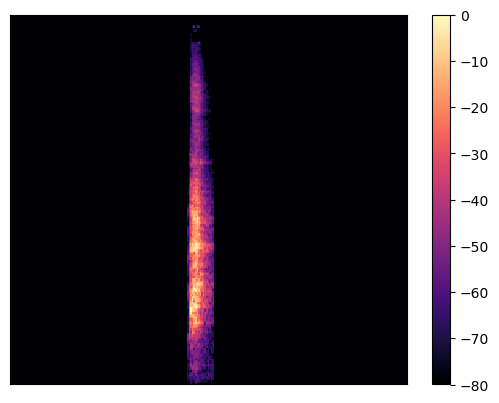

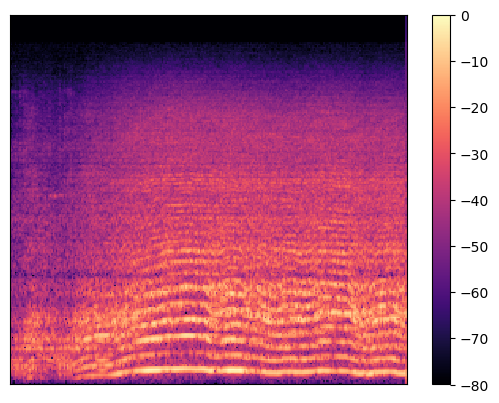

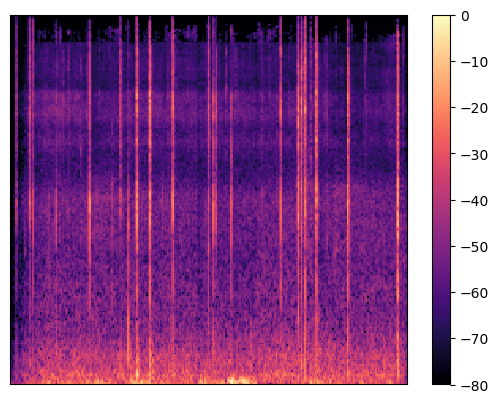

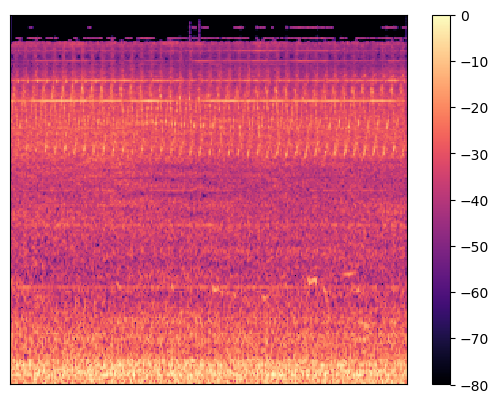

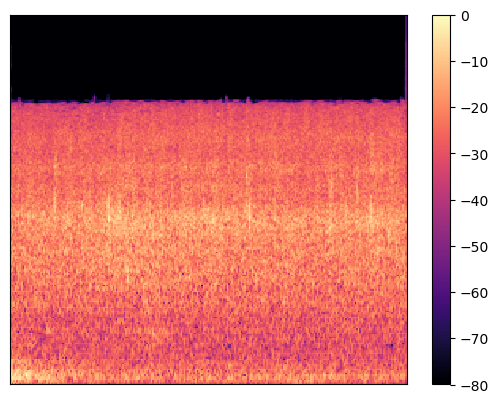

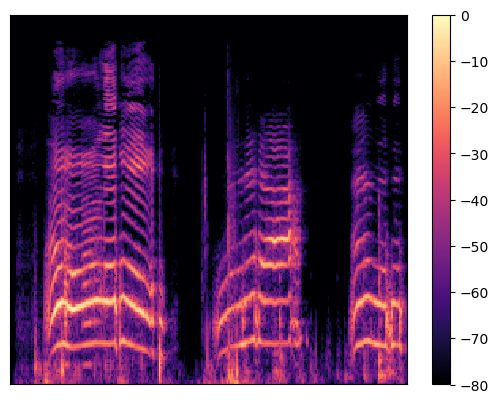

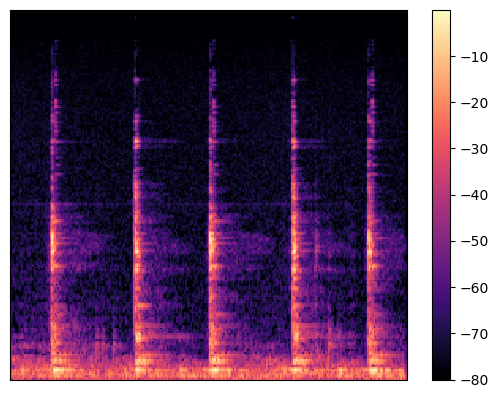

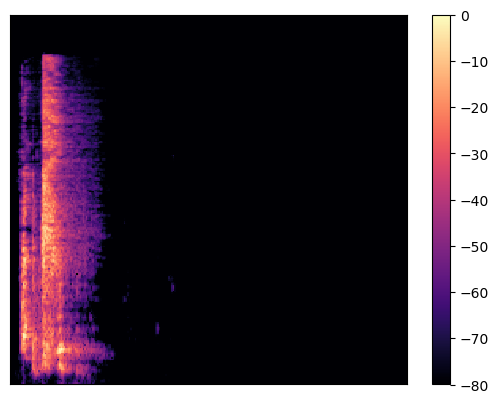

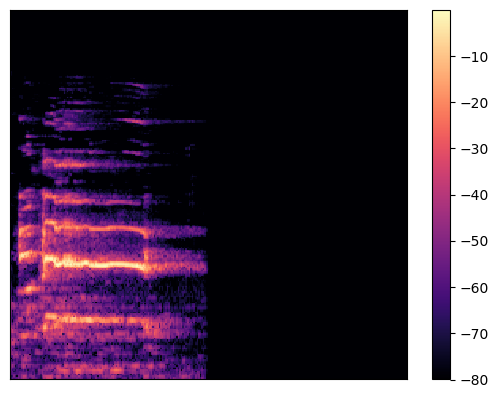

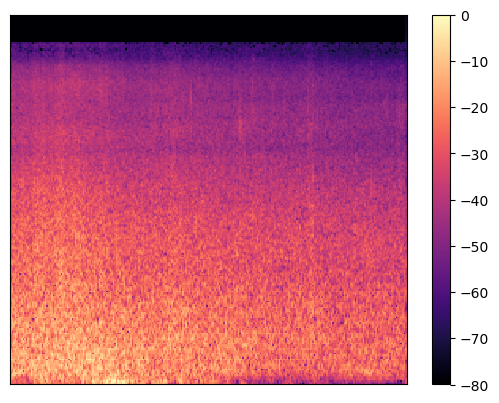

In [4]:
all_data = []
all_labels = []
df = pd.read_csv('ESC-50-master/meta/esc50.csv')
out_col = 'category'
in_col = 'filename'
c2i = {}
i2c = {}
num_classes = 10
df = df[df['esc10']]
categories = sorted(df[out_col].unique())
for i, category in enumerate(categories):
    c2i[category] = i
    i2c[i] = category
        
folder_path = 'ESC-50-master/audio'
used_label = [] 
for ind in tqdm(range(len(df))):
    row = df.iloc[ind]
    file_path = os.path.join(folder_path, row[in_col])
    if row['category'] in used_label:
        new_data = get_features(file_path)
    else: 
        print(row['category'])
        used_label.append(row['category'])
        new_data = get_features_plot(file_path)
    new_label = [c2i[row['category']]] * len(new_data)
    all_data.extend(new_data)
    all_labels.extend(new_label)
   

In [5]:
print(len(new_data))
print(len(all_data))
print(len(all_labels))

8
2861
2861


In [6]:
import json

# for i in range(len(all_data)):
#   all_data[i] = all_data[i].tolist()

X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.3, random_state=42)
# with open('Xtrain.json', 'w') as json_file:
#     json.dump(X_train, json_file, indent=4)
# with open('Xtest.json', 'w') as json_file:
#     json.dump(X_test, json_file, indent=4)
# with open('Ytrain.json', 'w') as json_file:
#     json.dump(y_train, json_file, indent=4)
# with open('Ytest.json', 'w') as json_file:
#     json.dump(y_test, json_file, indent=4)

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
clf.fit(X_train, y_train) 
sum(clf.predict(X_test) == y_test) / len(y_test)

0.9383003492433062

In [8]:
class linear_random_projection:
    def __init__(self,in_dim,out_dim):
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.init_projection()

    def init_projection(self):
        self.projection = np.random.normal(0, 1, size=(self.out_dim, self.in_dim))
        self.projection = np.sign(self.projection)

    def encode(self,x):
        enc = self.projection @ x
        enc = enc.squeeze()
        return np.sign(enc)

In [235]:
class hd_model:
    def __init__(self,X_train, X_test, y_train, y_test ,in_dim,out_dim,lr, epoch):
        
        scaler = StandardScaler() 
        scaler.fit(X_train)
        self.X_train = X_train
        self.X_test = X_test
        self.X_train = scaler.transform(X_train)
        self.X_test = scaler.transform(X_test)
        
        self.y_train = y_train
        self.y_test = y_test
        
        # self.in_dim = in_dim
        self.in_dim = len(self.X_train[0])
        # print(self.in_dim)
        self.out_dim = out_dim
        self.lr = lr
        self.epoch = epoch

        self.encoder = linear_random_projection(self.in_dim,self.out_dim)
        self.class_hvs = np.zeros((10,self.out_dim))
        
        self.train_encs = []
    
    def train_(self):
        n_train = len(self.X_train)
        for i in range(n_train):
            sample = self.X_train[i]
            label = self.y_train[i]
            enc = self.encoder.encode(sample)  
            similarities = cosine_similarity(enc.reshape(1, -1), self.class_hvs)[0]
            pred = np.argmax(similarities)
            # self.class_hvs[label] += 2 * (1-similarities[label]) * enc
            # self.class_hvs[pred] -= 2 * (1-similarities[pred]) * enc
            # print(enc[0])
            # print(enc[1])
            # print(np.max(similarities))
            encl = enc * (1 - np.max(similarities)) *  self.lr
            # print(encl[0])
            # print(encl[1])
            self.class_hvs[label] += encl 
            self.class_hvs[pred] -= encl 
            self.train_encs.append(enc)

    
    def test_(self):
        preds = []
                           
        n_test = len(self.X_test)
        for i in range(n_test):
            sample = self.X_test[i]
            label = self.y_test[i]
            enc = self.encoder.encode(sample)
            similarities = cosine_similarity(enc.reshape(1, -1), self.class_hvs)[0]
            pred = np.argmax(similarities)
            preds.append(pred)
        
        # print("================================")
        # print(accuracy_score(self.y_test, preds))
        if (accuracy_score(self.y_test, preds) > 0.93):
            print(str(self.lr) + " " + str(self.epoch) + " " + accuracy_score(self.y_test, preds))
        # print(f1_score(self.y_test, preds, average="weighted"))
        # cm = confusion_matrix(self.y_test, preds,labels=[0,1,2,3,4,5,6,7,8,9])
        # print(cm)
        # sns.heatmap(cm, annot=True)
        # print("================================")




    def retrain(self):
        for e in range(self.epoch):
            count = 0
            # print(e)
            for i in range(len(self.train_encs)):
                enc = self.train_encs[i]
                label = self.y_train[i]
                similarities = cosine_similarity(enc.reshape(1, -1), self.class_hvs)[0]
                pred = np.argmax(similarities)
                if pred != label:
                    # self.class_hvs[label] += self.lr * (1-similarities[label]) * enc
                    # self.class_hvs[pred] -= self.lr * (1-similarities[pred]) * enc
                    encl = enc * (1 - np.max(similarities)) * self.lr
                    self.class_hvs[label] += encl
                    self.class_hvs[pred] -= encl
                    count += 1


In [236]:
model = hd_model(X_train, X_test, y_train, y_test,128,10000,0.75, 10)
# with open('projection.json', 'w') as json_file:
#     json.dump(model.encoder.projection.tolist(), json_file, indent=4)
# with open('Xtrain.json', 'w') as json_file:
#     json.dump(model.X_train.tolist(), json_file, indent=4)
# with open('Xtest.json', 'w') as json_file:
#     json.dump(model.X_test.tolist(), json_file, indent=4)
# with open('Ytrain.json', 'w') as json_file:
#     json.dump(y_train, json_file, indent=4)
# with open('Ytest.json', 'w') as json_file:
#     json.dump(y_test, json_file, indent=4)
print(len(X_train))
model.train_()
model.test_()




2002


In [237]:
# c_array_str = "float x_train[][] = {\n"
# for row in model.X_train:
#     row_str = ", ".join(map(str, row))
#     c_array_str += f"    {{{row_str}}},\n"
# c_array_str += "};"

# with open('X_train.txt', 'w') as file:
#     file.write(c_array_str)

# c_array_str = "float x_test[][] = {\n"
# for row in model.X_test:
#     row_str = ", ".join(map(str, row))
#     c_array_str += f"    {{{row_str}}},\n"
# c_array_str += "};"

# with open('X_test.txt', 'w') as file:
#     file.write(c_array_str)

# c_array_str = "signed char y_train[] = {\n"
# for row in model.y_train:
#     c_array_str += str(row)
#     c_array_str += "\n"
# c_array_str += "};"

# with open('Y_train.txt', 'w') as file:
#     file.write(c_array_str)

# c_array_str = "signed char y_test[] = {\n"
# for row in model.y_test:
#     c_array_str += str(row)
#     c_array_str += "\n"
# c_array_str += "};"

# with open('Y_test.txt', 'w') as file:
#     file.write(c_array_str)

In [238]:
# import array
# import struct


# #bit_array_projection = [array.array('B', [0] * (model.in_dim // 8)) for _ in range(model.out_dim)]

# #type(0b10000000)
# bit_array_projection = [[0]*(model.in_dim//8)]*model.out_dim
# for i in range(model.out_dim):
#     for j in range(model.in_dim//8):
#         bit_array_projection[i][j] = struct.pack('B', 0)

# print(type(bit_array_projection[0][0]))

# for i in range(model.out_dim):
#     for j in range(model.in_dim):
#         if model.encoder.projection[i][j]==1:
#             print('i: ', i)
#             print('j: ', j)
#             print((int(model.encoder.projection[i][j//8])))
#             print((0b10000000 >> (j % 8)))
#             print((int(model.encoder.projection[i][j//8])) | (0b10000000 >> (j % 8)))
#             bit_array_projection[i][j//8] = struct.pack('B', (int(model.encoder.projection[i][j//8])) | (0b10000000 >> (j % 8)) % 256) 
#         else:
#             bit_array_projection[i][j//8] =  struct.pack('B', (int(model.encoder.projection[i][j//8])) & (~(0b10000000 >> (j % 8))) % 256)

# for i in range(model.out_dim):
#     for j in range(model.in_dim):
#         byte_index = j // 8
#         bit_index = j % 8
#         byte_value = np.frombuffer(bit_array_projection[i, byte_index], dtype=np.uint8)[0]
#         if model.encoder.projection[i, j//8] == 1:
#             new_byte_value = model.encoder.projection[i, j//8] | (0b10000000 >> bit_index)
#         else:
#             new_byte_value = model.encoder.projection[i, j//8] & (~(0b10000000 >> bit_index))
#         bit_array_projection[i, byte_index] = np.chararray.tobytes(np.array([new_byte_value], dtype=np.uint8))


In [239]:
# temp = []
# for i in range(len(model.encoder.projection)):
#     temp2 = []
#     for j in range(len(model.encoder.projection[0])//8):
#         a = 0
#         for k in range(8):
#             a = a * 2
#             if (model.encoder.projection[i][j*8+7-k] > 0):
#                 a = a + 1
#         temp2.append(a)
#             #print(a)
#     temp.append(temp2)
    
# temp = temp.astype(int).tolist()

# c_array_str = "signed char projection[][] = {\n"

# for row in temp:
#     row_str = ", ".join(map(str, row))
#     c_array_str += f"    {{{row_str}}},\n"
# c_array_str += "};"

# with open('projection.txt', 'w') as file:
#     file.write(c_array_str)

In [240]:


# with open('projection.json', 'w') as json_file:
#     json.dump(model.encoder.projection.tolist(), json_file, indent=4)

In [241]:
model.retrain()
model.test_()
class_hvs_int = model.class_hvs.astype(int).tolist()
c_array_str = "signed char class_hvs[][] = {\n"
for row in class_hvs_int:
    row_str = ", ".join(map(str, row))
    c_array_str += f"    {{{row_str}}},\n"
c_array_str += "};"

# Write the C array string to a text file
with open('class_hvs.txt', 'w') as file:
    file.write(c_array_str)
    
# with open('class_hvs.txt', 'w') as json_file:
#     json.dump(model.class_hvs.astype(int).tolist(), json_file, indent=4)

In [242]:
model.class_hvs

array([[-14.12038659,   6.45286306,  -6.78537988, ...,  14.81827869,
         -4.67697884,  10.09236426],
       [ -2.64028763, -18.31980696,   6.80146291, ...,  -1.41611411,
          6.9226997 ,   2.54580104],
       [ 28.4854509 ,   3.53340321, -10.63526368, ...,   2.01999264,
         -0.79794996,   2.23590018],
       ...,
       [ -5.30940639,  -9.53405757,   1.47142021, ...,  -9.83569153,
        -13.82728544,   8.29393201],
       [ -0.80117237,   4.2042118 ,  19.34137882, ...,  -4.12605078,
          5.51963631,  10.26997946],
       [  6.22263959,   7.63293903,   8.69305552, ...,   2.93185299,
         -1.05368036, -13.32111324]])

In [243]:
array_class_hvs = np.array(model.class_hvs)

# for hypervector in array_class_hvs:
    # pruned_hyperfector = hypervector[hypervector >= ]

In [244]:
for i in range(41):
    for j in range(17):
        model = hd_model(X_train, X_test, y_train, y_test,128,10000,i*0.05, j)
        model.train_()
        model.test_()
        model.retrain()
        model.test_()
